In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install sdmetrics
!pip install sdv
!pip install scikit-learn==1.1

In [3]:
from pandas import read_csv, DataFrame
from common.config import get_analysis_config

import json

In [4]:
analysis_config = get_analysis_config()
path = analysis_config['output_files']['metrics']
f = open(path)
data = json.load(f)

In [5]:
entries = []
for dataset, info in data.items():
    for model, model_info in info.items():
        for bundle, bundle_info in model_info.items():
            for cat, cat_info in bundle_info.items():
                for metric, metric_info in cat_info.items():
                    entries.append([dataset, model, bundle, cat, metric, metric_info['mean'], metric_info['std']])

results_df = DataFrame(entries, columns=['dataset', 'model', 'metric_bundle', 'metric_category', 'metric', 'mean', 'std'])

In [6]:
results_df

,dataset,model,metric_bundle,metric_category,metric,mean,std
0,sdv.adult,fabric.regular,sdv,single_columns,category_coverage,0.978408,0.036825
1,sdv.adult,fabric.regular,sdv,single_columns,range_coverage,0.896755,0.148007
2,sdv.adult,fabric.regular,sdv,single_columns,bounary_adherence,1.000000,0.000000
3,sdv.adult,fabric.regular,sdv,single_columns,ks_complement,0.991908,0.002586
4,sdv.adult,fabric.regular,sdv,single_columns,tv_complement,0.864773,0.257351
...,...,...,...,...,...,...,...
167,sdv.mnist12,sdv.ctgan,sdv,single_columns,bounary_adherence,0.999258,0.002372
168,sdv.mnist12,sdv.ctgan,sdv,single_columns,ks_complement,0.945840,0.074552
169,sdv.mnist12,sdv.ctgan,sdv,single_columns,tv_complement,0.944868,0.076278
170,sdv.mnist12,sdv.ctgan,sdv,single_columns,statistic_similarity,NaN,NaN


In [7]:
import matplotlib.pyplot as plt

In [8]:
overall_mean = results_df.groupby(by='model').mean()
overall_mean

,mean,std
model,,
fabric.regular,0.977974,0.038028
sdv.copula_gan,0.945277,0.054711
sdv.ctgan,0.914112,0.081344
sdv.gaussian_copula,0.860911,0.126811
sdv.tabular,0.872310,0.091327
sdv.tvae,0.919779,0.080221


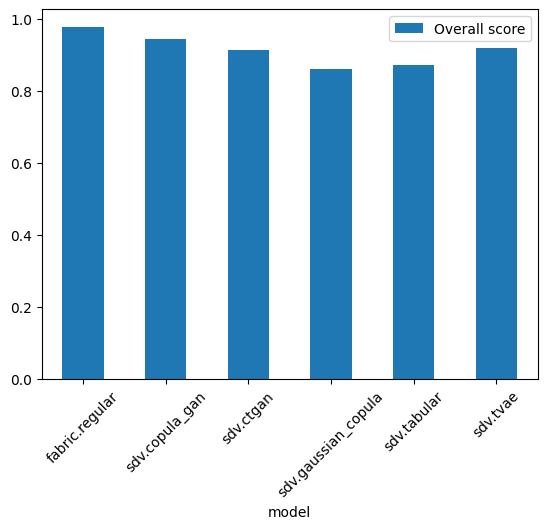

In [9]:
fig = overall_mean.reset_index()[['model', 'mean']].plot.bar(x='model', y='mean', rot=45, label='Overall score')

In [10]:
overall_per_dataset = results_df.groupby(by=['dataset', 'model']).mean()
overall_per_dataset

mean       std
dataset     model                                  
sdv.adult   fabric.regular       0.944752  0.078346
            sdv.copula_gan       0.903950  0.093452
            sdv.ctgan            0.856242  0.129164
            sdv.gaussian_copula  0.786638  0.166964
            sdv.tabular          0.776370  0.116343
            sdv.tvae             0.854752  0.144676
sdv.asia    fabric.regular       1.000000  0.000000
            sdv.copula_gan       1.000000  0.000000
            sdv.ctgan            1.000000  0.000000
            sdv.gaussian_copula  0.968750  0.082680
            sdv.tabular          1.000000  0.000000
            sdv.tvae             1.000000  0.000000
sdv.census  fabric.regular       0.989533  0.024023
            sdv.gaussian_copula  0.786927  0.167315
            sdv.tabular          0.859332  0.114831
sdv.covtype fabric.regular       0.993391  0.030515
            sdv.gaussian_copula  0.915059  0.118417
            sdv.tabular          0.907855  0.113142
sdv.mnist12 fabric.regular       0.998358  0.002101
            sdv.copula_gan       0.990239  0.014269
            sdv.ctgan            0.972442  0.038331
            sdv.gaussian_copula  0.985222  0.020316
            sdv.tabular          0.993727  0.006850
            sdv.tvae             0.993465  0.007536

In [11]:
overall_per_metric = results_df.groupby(by=['metric', 'model']).mean()
overall_per_metric

mean       std
metric                   model                                  
bounary_adherence        fabric.regular       0.999961  0.000116
                         sdv.copula_gan       1.000000  0.000000
                         sdv.ctgan            0.999629  0.001186
                         sdv.gaussian_copula  0.999883  0.000304
                         sdv.tabular          0.999265  0.001889
                         sdv.tvae             0.999999  0.000009
category_coverage        fabric.regular       0.995159  0.022443
                         sdv.copula_gan       0.994022  0.011246
                         sdv.ctgan            0.990318  0.013854
                         sdv.gaussian_copula  0.958242  0.111528
                         sdv.tabular          0.985286  0.050629
                         sdv.tvae             0.920623  0.121821
contingency_similarity   fabric.regular       0.777044  0.257058
                         sdv.tabular          0.218387  0.175999
correlation_similarity   fabric.regular       0.996477  0.001990
                         sdv.tabular          0.996931  0.002600
ks_complement            fabric.regular       0.993093  0.004672
                         sdv.copula_gan       0.955238  0.039586
                         sdv.ctgan            0.860762  0.147178
                         sdv.gaussian_copula  0.756339  0.202849
                         sdv.tabular          0.852049  0.102960
                         sdv.tvae             0.912717  0.070367
missing_value_similarity fabric.regular       0.999907  0.000079
                         sdv.copula_gan       0.999921  0.000049
                         sdv.ctgan            0.999921  0.000049
                         sdv.gaussian_copula  0.999898  0.000102
                         sdv.tabular          0.999906  0.000094
                         sdv.tvae             0.999921  0.000049
range_coverage           fabric.regular       0.948842  0.128416
                         sdv.copula_gan       0.696633  0.246216
                         sdv.ctgan            0.690690  0.328426
                         sdv.gaussian_copula  0.660362  0.384113
                         sdv.tabular          0.640615  0.388034
                         sdv.tvae             0.660602  0.314969
statistic_similarity     fabric.regular       0.996145  0.003348
                         sdv.copula_gan       0.987272  0.007153
                         sdv.ctgan            0.991288  0.003661
                         sdv.gaussian_copula  0.968021  0.038207
                         sdv.tabular          0.984411  0.014260
                         sdv.tvae             0.984378  0.011651
tv_complement            fabric.regular       0.954392  0.080890
                         sdv.copula_gan       0.853207  0.178029
                         sdv.ctgan            0.750150  0.200402
                         sdv.gaussian_copula  0.649861  0.220604
                         sdv.tabular          0.743411  0.149978
                         sdv.tvae             0.822850  0.165856

In [12]:
overall_per_model = results_df.groupby(by=['model', 'dataset']).mean()
overall_per_model

mean       std
model               dataset                        
fabric.regular      sdv.adult    0.944752  0.078346
                    sdv.asia     1.000000  0.000000
                    sdv.census   0.989533  0.024023
                    sdv.covtype  0.993391  0.030515
                    sdv.mnist12  0.998358  0.002101
sdv.copula_gan      sdv.adult    0.903950  0.093452
                    sdv.asia     1.000000  0.000000
                    sdv.mnist12  0.990239  0.014269
sdv.ctgan           sdv.adult    0.856242  0.129164
                    sdv.asia     1.000000  0.000000
                    sdv.mnist12  0.972442  0.038331
sdv.gaussian_copula sdv.adult    0.786638  0.166964
                    sdv.asia     0.968750  0.082680
                    sdv.census   0.786927  0.167315
                    sdv.covtype  0.915059  0.118417
                    sdv.mnist12  0.985222  0.020316
sdv.tabular         sdv.adult    0.776370  0.116343
                    sdv.asia     1.000000  0.000000
                    sdv.census   0.859332  0.114831
                    sdv.covtype  0.907855  0.113142
                    sdv.mnist12  0.993727  0.006850
sdv.tvae            sdv.adult    0.854752  0.144676
                    sdv.asia     1.000000  0.000000
                    sdv.mnist12  0.993465  0.007536

In [17]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from pathlib import Path

from common.config import ANALYSIS_PLOTS_PATH


p = Path(ANALYSIS_PLOTS_PATH)
fig.figure.tight_layout()
fig.figure.savefig(p / f"overall_score.png")
tmpfile = BytesIO()
fig.figure.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

In [14]:
import json

metadata = {
    "outputs": [
        {
          "type": "table",
          "storage": "inline",
          "format": "csv",
          "header": [" "] + list(results_df.columns),
          "source": results_df.to_csv()
        },
        {
          "type": "table",
          "storage": "inline",
          "format": "csv",
          "header": [" "] + list(overall_mean.reset_index().columns),
          "source": overall_mean.reset_index().to_csv()
        },
        {
          "type": "table",
          "storage": "inline",
          "format": "csv",
          "header": [" "] + list(overall_per_dataset.reset_index().columns),
          "source": overall_per_dataset.reset_index().to_csv()
        },
        {
          "type": "table",
          "storage": "inline",
          "format": "csv",
          "header": [" "] + list(overall_per_model.reset_index().columns),
          "source": overall_per_model.reset_index().to_csv()
        },
        {
          "type": "table",
          "storage": "inline",
          "format": "csv",
          "header": [" "] + list(overall_per_metric.reset_index().columns),
          "source": overall_per_metric.reset_index().to_csv()
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": results_df.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": overall_per_metric.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": overall_mean.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": overall_per_dataset.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": overall_per_model.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": overall_per_metric.to_html(),
        },
        {
          "type": "web-app",
          "storage": "inline",
          "source": f"<img src='data:image/png;base64,{encoded}'>",
        }
    ]
  }

with open("mlpipeline-ui-metadata.json", "w") as metadata_file:
    json.dump(metadata, metadata_file)